In [9]:
import os
from netCDF4 import Dataset
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from scipy.interpolate import griddata
import matplotlib.ticker as mticker

In [3]:
# To use PLUMBER2_GPP_common_utils, change directory to where it exists
os.chdir('/g/data/w97/mm3972/scripts/Land_Drought_Rainfall')
from common_utils import *
from spatial_wrf_hgt_var import *

In [4]:
CABLE_restart  = '/g/data/w97/mm3972/model/cable/runs/Land_drought_rainfall_runs/spinup_run_1970_1999/restarts/restart_1970_one_year_5km_run_with_SM_ST_spinup_read_from_gridinfo.nc'   
gridinfo       = '/g/data/w97/mm3972/model/cable/src/CABLE-AUX/offline/mmy_gridinfo_AU/gridinfo_AWAP_CSIRO_AU_NAT_new_iveg_mask.nc'

(6, 271397)


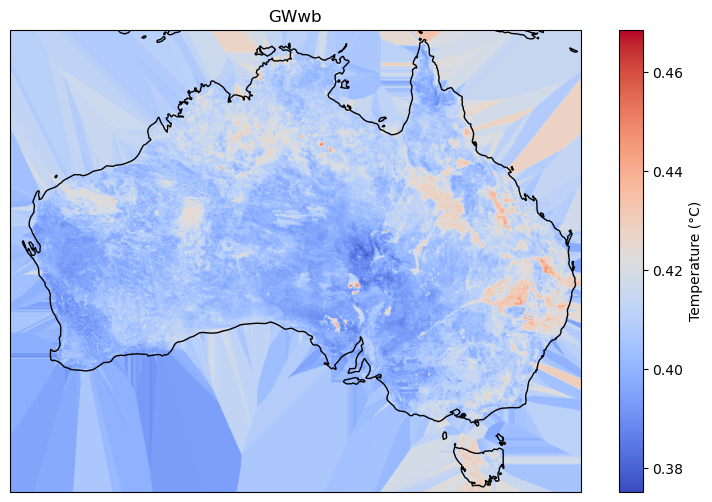

In [5]:
with Dataset(CABLE_restart,'r') as f_restart:
    
    lat_1d    = f_restart.variables['latitude'][:]
    lon_1d    = f_restart.variables['longitude'][:]
    GWwb_1d   = f_restart.variables['GWwb'][:]
    wb_1d     = f_restart.variables['wb'][:]
    wbtot0_1d = f_restart.variables['wbtot0'][:]
    wbice_1d  = f_restart.variables['wbice'][:]
    wb_hys_1d = f_restart.variables['wb_hys'][:]
    ssat_1d   = f_restart.variables['ssat'][:]
    print(np.shape(wb_hys_1d))

with Dataset(gridinfo,'r') as f_grid: 
    
    lat_out_1d  = f_grid.variables['latitude'][:]
    lon_out_1d  = f_grid.variables['longitude'][:]
    
lon_out_2d, lat_out_2d = np.meshgrid(lon_out_1d, lat_out_1d)

# Step 2: Interpolate temperature data onto the grid
GWwb_grid = griddata((lon_1d, lat_1d), ssat_1d, (lon_out_2d, lat_out_2d), method='nearest')

# Step 3: Plot using imshow
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add coastlines and borders for context
ax.coastlines()
ax.add_feature(cfeature.BORDERS)

# Use imshow to display the interpolated temperature data
# extent is [min_lon, max_lon, min_lat, max_lat]
img = ax.imshow(GWwb_grid, extent=[min(lon_out_1d), max(lon_out_1d), min(lat_out_1d), max(lat_out_1d)],
                origin='lower', cmap='coolwarm', transform=ccrs.PlateCarree())

# Add a colorbar
cbar = plt.colorbar(img, ax=ax, orientation='vertical', label='Temperature (°C)')

# Add a title
plt.title('GWwb')

# Display the plot
plt.show()

### Check GW map

In [10]:
GW_reduce50_file = '/g/data/w97/mm3972/scripts/Land_Drought_Rainfall/process_for_CABLE/nc_files/CABLE_restart_files/restart_1970_one_year_5km_run_with_SM_ST_spinup_read_from_gridinfo_GWMoist_reduce_50percent.nc'   
GW_reduce70_file = '/g/data/w97/mm3972/scripts/Land_Drought_Rainfall/process_for_CABLE/nc_files/CABLE_restart_files/restart_1970_one_year_5km_run_with_SM_ST_spinup_read_from_gridinfo_GWMoist_reduce_70percent.nc'

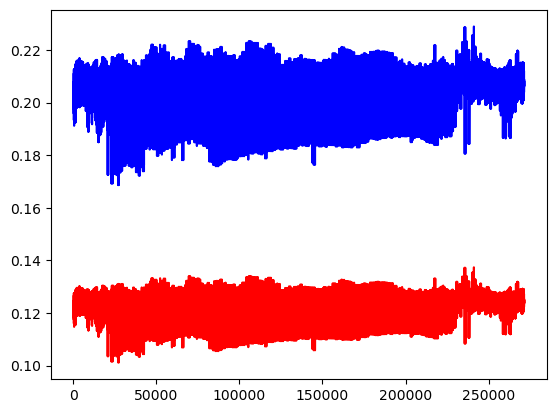

In [14]:
with Dataset(GW_reduce50_file,'r') as f_gw50:
    
    GWwb_R50    = f_gw50.variables['GWwb'][:]
    
with Dataset(GW_reduce70_file,'r') as f_gw70:
    
    GWwb_R70 = f_gw70.variables['GWwb'][:]
    
    # diff = GWwb_R70 - GWwb_R50
plt.plot(GWwb_R50, color='blue')
plt.plot(GWwb_R70, color='red')
# Display the plot
plt.show()